In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
sys.path.insert(1, '/global/homes/j/joeschm/IFS_scripts')

from ParIO import Parameters 
from read_write_geometry import read_geometry_local

In [2]:
def extract_geom(scanfile_path):

    os.chdir(scanfile_path)

    #for more detail of the geometry file, check the GENE manual 4.11
    suffix='_0001'

    #Import the parameters from parameter file using ParIO
    par = Parameters()
    par.Read_Pars('parameters' + suffix)
    pars = par.pardict

    #getting B field using read_write_geometry.py
    gpars,geometry = read_geometry_local(pars['magn_geometry'][1:-1]+suffix)

    #available variables:
    ggxx     = geometry['ggxx']
    ggxy     = geometry['ggxy']
    ggxz     = geometry['ggxz']
    ggyy     = geometry['ggyy']
    ggyz     = geometry['ggyz']
    ggzz     = geometry['ggzz']
    gBfield  = geometry['gBfield']
    gdBdx    = geometry['gdBdx']
    gdBdy    = geometry['gdBdy']
    gdBdz    = geometry['gdBdz']
    gjacobian= geometry['gjacobian']
    gl_R     = geometry['gl_R']
    gl_phi   = geometry['gl_phi']
    gl_z     = geometry['gl_z']
    gl_dxdR  = geometry['gl_dxdR']
    gl_dxdZ  = geometry['gl_dxdZ']
    
    data_col = {'ggxx': ggxx, 
                'ggxy': ggxy, 
                'ggxz': ggxz,
                'ggyy': ggyy, 
                'ggyz': ggyz, 
                'ggzz': ggzz, 
                'gBfield': gBfield, 
                'gdBdx': gdBdx, 
                'gdBdy': gdBdy, 
                'gdBdz': gdBdz,
                'gjacobian': gjacobian,
                'gl_R': gl_R,
                'gl_phi': gl_phi,
                'gl_z': gl_z,
                'gl_dxdR': gl_dxdR,
                'gl_dxdZ': gl_dxdZ
               }
    
    g_df = pd.DataFrame(data = data_col)
    
    
    #go up one directory and print all the scanfiles available
    os.chdir('..')
    print(sorted(os.listdir()))
    
    nz0 = pars['nz0']
    x0 = pars['x0']
    magn_geometry = pars['magn_geometry']
    
    #print the current directory and the nz0 resolution
    print(scanfile_path)
    print('nz0 resolution:', nz0)
    print('x0:', x0)
    print('magn_geometry:', magn_geometry)
    print('')
    
    return g_df

In [3]:
def flux_plots(width, height, scale, R_g1, Z_g1, g1_name, R_g2, Z_g2, g2_name):
    plt.figure(figsize=(width*scale, height*scale),dpi=80)
    plt.plot(R_g1, Z_g1, label = g1_name, marker = '+')
    plt.plot(R_g2, Z_g2, label = g2_name)
    plt.legend()

In [4]:
def plot_g_diff(g1, g2, g1_name, g2_name, scale, plots):
    g_diff = g1 - g2
    gd_mean = g_diff.mean()
    
    R_g1 = g1['gl_R']
    Z_g1 = g1['gl_z']

    R_g2 = g2['gl_R']
    Z_g2 = g2['gl_z']
    
    width = np.max(R_g1)-np.min(R_g1)
    height = np.max(Z_g1)-np.min(Z_g1)
    
    #print(width, height)
    #width2 = np.max(R_g2)-np.min(R_g2)
    #height2 = np.max(Z_g2)-np.min(Z_g2)

    #print(width2, height2)
    #width = width2
    #height = height2
    
    #print(width, height)
    
    if plots == 'all plots':
        #All geometry plots
        print('\n Difference in Geometry Parameters')
        g_diff.plot(subplots=True, layout=(4,4), figsize=(10,10))
        plt.title('Diff')
        plt.tight_layout()
        plt.show()
  
        #Flux plots
        #flux_plots(width, height, scale, R_g1, Z_g1, g1_name, R_g2, Z_g2, g2_name)
        plt.figure(figsize=(width*scale, height*scale),dpi=80)
        plt.plot(R_g1, Z_g1, label = g1_name, marker = '+')
        plt.plot(R_g2, Z_g2, label = g2_name)
        plt.legend()
        
    elif plots == 'flux plots':
        #Flux plots
        #flux_plots(width, height, scale, R_g1, Z_g1, g1_name, R_g2, Z_g2, g2_name)
        plt.figure(figsize=(width*scale, height*scale),dpi=80)
        plt.plot(R_g1, Z_g1, label = g1_name, marker = '+')
        plt.plot(R_g2, Z_g2, label = g2_name)
        plt.legend()
        
    
    else:
        print('specify plots with "all plots" or "flux plots".')
        

In [5]:
C2_efit_path = "/global/cscratch1/sd/joeschm/162940/COMP_efit"
C2_miller_path = "/global/cscratch1/sd/joeschm/162940/COMP_miller"

['scanfiles0000', 'scanfiles0001', 'scanfiles0002', 'scanfiles0003', 'scanfiles0004', 'scanfiles0005', 'scanfiles0006', 'scanfiles0007', 'scanfiles0008', 'scanfiles0009', 'scanfiles0010', 'scanfiles0011']
/global/cscratch1/sd/joeschm/AUG/Comparison_test/efit2_vs_REG_miller2/scanfiles0004
nz0 resolution: 512
x0: 0.98513
magn_geometry: 'tracer_efit'

['scanfiles0000', 'scanfiles0001', 'scanfiles0002', 'scanfiles0003', 'scanfiles0004', 'scanfiles0005', 'scanfiles0006', 'scanfiles0007', 'scanfiles0008', 'scanfiles0009', 'scanfiles0010', 'scanfiles0011']
/global/cscratch1/sd/joeschm/AUG/Comparison_test/efit2_vs_REG_miller2/scanfiles0010
nz0 resolution: 512
x0: 0.9899015
magn_geometry: 'miller'



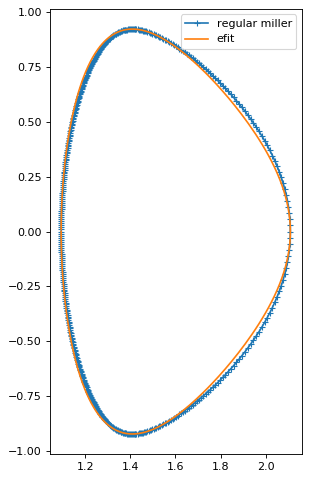

In [10]:
filepath = "/global/cscratch1/sd/joeschm/AUG/Comparison_test/efit2_vs_REG_miller2"

g_REG_miller2 = extract_geom(filepath + '/scanfiles0004')
g_efit2 = extract_geom(filepath + '/scanfiles0010')

plot_g_diff(g_REG_miller2, g_efit2, 'regular miller', 'efit', 4, 'flux plots')